In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../resources/datasets/AmazonSalesData copy.csv")

num_cols = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("object").columns

df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


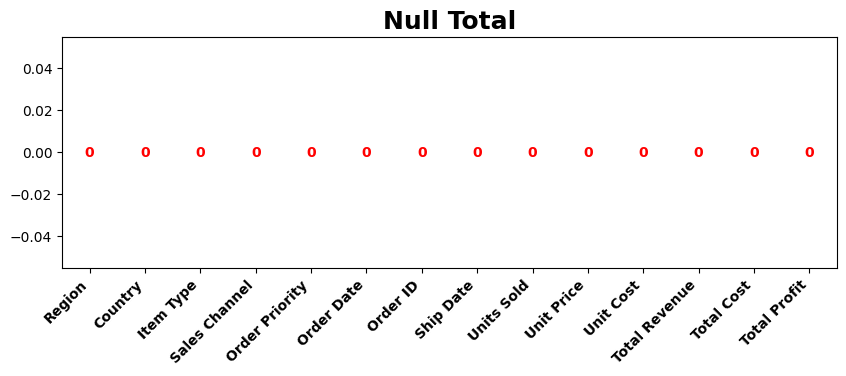

In [4]:
df.isnull().sum().plot(kind="bar", figsize=(10, 3))
plt.title("Null Total",fontdict=dict({"fontsize": 18, "fontweight": "bold"}))
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')

for i, value in enumerate(df.isnull().sum()):
    plt.text(i, value, str(value), ha='center', va='center', fontdict=dict({'fontsize': 10, "fontweight": "bold", "color": "red"}))

plt.show()

In [5]:
anomalies = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    anomaly = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    if anomaly:
        anomalies[col] = anomaly

print("Anomalies Detected: ")
print(anomalies)

Anomalies Detected: 
{'Units Sold': [999999, 898989], 'Total Revenue': [5997054.98, 5513227.5, 5396577.27], 'Total Cost': [4509793.96, 4145955.0, 4350343.52], 'Total Profit': [1487261.02, 1505888.07, 1541705.29, 1719922.04, 1678540.98]}


In [7]:
anomaly_data = {
    'Column': [],
    'Anomaly Count': [],
    'Anomaly Values': []
}

for column, values in anomalies.items():
    anomaly_data['Column'].append(column)
    anomaly_data['Anomaly Count'].append(len(values))
    anomaly_data['Anomaly Values'].append(', '.join(map(str, values)))

df_anomalies = pd.DataFrame(anomaly_data)
df_anomalies.head().style.set_properties(**{'border':'solid 1.5px #1c1c1c','background':'rgba(150,214,214,0.4)'})

,Column,Anomaly Count,Anomaly Values
0,Units Sold,2,"999999, 898989"
1,Total Revenue,3,"5997054.98, 5513227.5, 5396577.27"
2,Total Cost,3,"4509793.96, 4145955.0, 4350343.52"
3,Total Profit,5,"1487261.02, 1505888.07, 1541705.29, 1719922.04, 1678540.98"


In [8]:
df[list(anomalies.keys())]

,Units Sold,Total Revenue,Total Cost,Total Profit
0,9925,2533654.00,1582243.50,951410.50
1,2804,576782.80,328376.44,248406.36
2,1779,1158502.59,933903.84,224598.75
3,8102,75591.66,56065.84,19525.82
4,5062,3296425.02,2657347.52,639077.50
...,...,...,...,...
95,888,97040.64,31825.92,65214.72
96,6267,58471.11,43367.64,15103.47
97,1485,228779.10,135031.05,93748.05
98,5767,471336.91,326815.89,144521.02
